In [1]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
reducer = umap.UMAP(n_neighbors=50)

In [4]:
np.random.seed(219)

In [6]:
df = pd.read_csv("../features_30_sec.csv")
#df = df.sample(5000, axis=0)
labels = df['label']
df = df.drop(["filename", "length", "label"], axis = 1)
df = pd.DataFrame(StandardScaler().fit_transform(df))
df

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,-0.661934,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,0.795823,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,-0.744406,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,-0.246530,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,-0.190517,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.325957,-0.757009,-0.783606,-0.744969,-0.270585,-0.467974,-0.258529,-0.502756,-0.202028,-0.436631,...,0.140217,-0.464398,-2.050383,-0.623944,0.511084,-0.783303,-1.167931,-0.305875,-0.025668,-0.446301
996,0.244975,-1.455644,-0.829723,-0.678065,-0.272410,-0.717688,-0.330003,-0.566898,-0.268240,-0.560053,...,0.566107,-0.796066,-1.513447,-0.694466,0.355178,-0.921994,-1.367241,-0.727623,-0.443273,-0.848395
997,0.654637,-1.431989,-0.750625,-0.751249,-0.173636,-0.594046,-0.599270,-0.646859,-0.343166,-0.730237,...,0.150753,-0.803610,-1.952593,-0.784951,0.758508,-0.805923,-2.732844,-0.638651,-0.263615,-0.890605
998,-0.198339,0.668144,-0.716978,-0.506618,-1.122245,-0.572432,-0.806175,-0.290319,-0.988510,-0.359199,...,-0.865330,-0.426656,-0.098962,-0.569286,0.271131,-0.854487,-0.722717,-0.511485,-0.650649,-0.637683


In [7]:
embedding = reducer.fit_transform(df)

In [8]:
embedding.shape

(1000, 2)

In [9]:
embedding
embed_df = pd.DataFrame(embedding)

In [10]:
x = embed_df.iloc[:,0]

In [11]:
y = embed_df.iloc[:,1]

In [12]:
unique_labels = pd.unique(labels)
unique_labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [13]:
color_map = {}
for color_num in range(0,len(unique_labels)):
    color_map[unique_labels[color_num]] = color_num

In [14]:
color_map

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [15]:
labels_nums = labels.map(lambda x: color_map[x]).tolist()

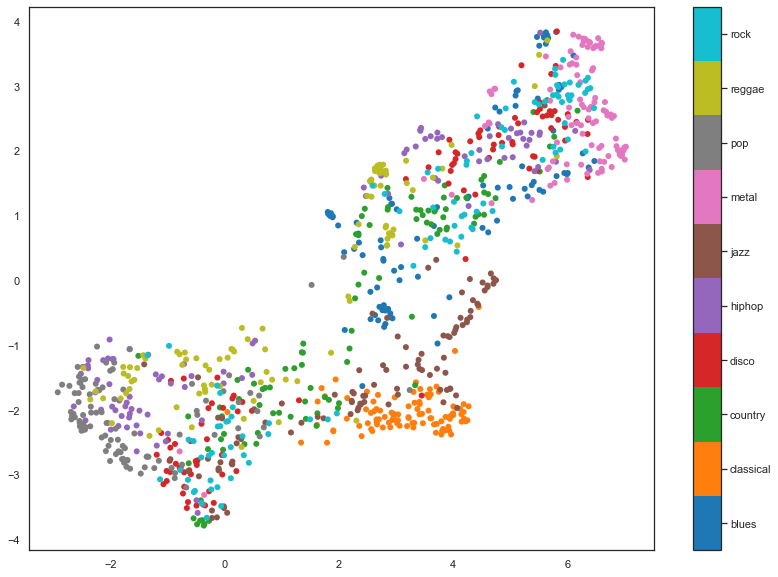

In [17]:
plt.scatter(x,
            y,
            c = labels_nums,
            cmap='tab10',
            linewidths=.01 
)

cb = plt.colorbar(boundaries=np.arange(11)-0.5)
cb.set_ticks(range(10))
cb.set_ticklabels(unique_labels)
